# **Natural Language Processing Assignment 1**

**Assignment Objective** - You have to implement all of these techniques on a small corpus of your own choice taken from the web. Make sure to use the same corpus for all the tasks, also please give the reference of where you chose the corpus from. People attempting for advanced level are recommended to use a larger(production level/real-use) dataset.

## **Setup and Corpus Definition**

In [1]:
# --- Imports and Setup --- 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups

# Download necessary NLTK data (quietly)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

print("All necessary libraries imported and NLTK data downloaded.")

All necessary libraries imported and NLTK data downloaded.


In [2]:
# --- Our Chosen Corpus (Advanced Level) ---
# Source: 20 Newsgroups Dataset
# Link: http://qwone.com/~jason/20Newsgroups/
# Description: A collection of ~18,000 newsgroup documents, partitioned
# across 20 different topics. We are using a subset for this assignment.

# We will load a subset of 4 categories for demonstration.
# This is still a large dataset (thousands of documents).
categories_to_load = [
    'sci.space',      # Space science
    'rec.autos',      # Cars
    'comp.graphics',  # Computer graphics
    'talk.politics.mideast' # Politics
]

# Fetch the dataset
# We remove headers, footers, and quotes to get just the clean body text.
newsgroups_data = fetch_20newsgroups(subset='train', 
                                     categories=categories_to_load, 
                                     remove=('headers', 'footers', 'quotes'))

# Assign the list of documents to our 'corpus' variable
corpus = newsgroups_data.data

print(f"--- Original Corpus (Advanced) ---")
print(f"Successfully loaded {len(corpus)} documents.")

# We will use the 5th document (index 4) as our test doc.
# We pick one that is likely to have line breaks and other artifacts.
test_doc = corpus[4] 

print(f"\n--- Test Document for Part 1 processing (Document 5) --- ")
print(test_doc)

--- Original Corpus (Advanced) ---
Successfully loaded 2335 documents.

--- Test Document for Part 1 processing (Document 5) --- 


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.



## **Text Pre-processing for Natural Language Processing (NLP)**

Text preprocessing in NLP is the process of cleaning and preparing raw text data for analysis by machine learning or deep learning models. It involves converting text into a structured format through various steps. These steps ensure the text is consistent and meaningful, enabling models to better understand and process the data efficiently. Proper preprocessing is essential for improving the performance and accuracy of NLP models. The steps involved in pre-processing which we are going to be looking at in this tutorial are:
1) **Lowercasing**
2) **Removing Punctuations and Special Characrters**
3) **Stop-Words removal**
4) **Removal of URLs**
5) **Removal of HTML Tags**
6) **Stemming**
7) **Lemmatization**
8) **Tokenization**

====================================================================================================

<style>
blue {
  color: skyblue;
}
</style>

## 1) **Lowercasing**
Lowercasing converts all characters in a text to <blue>**lowercase**</blue>. It ensures uniformity by treating words like <blue>**"Dog"**</blue> and <blue>**"dog"**</blue> as the same entity. This is important for many NLP tasks since capitalization usually doesn't change the meaning of words.

Example:\
Input: "Natural Language Processing"\
Output: "natural language processing"

In [3]:
# 1. Applying Lowercasing to our test document
lowercased_doc = test_doc.lower()

print("--- Original Test Document ---")
print(test_doc)
print("\n--- After Lowercasing ---")
print(lowercased_doc)

--- Original Test Document ---


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.

--- After Lowercasing ---


freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

apparently, that's not the case with virginia.edu, since you are still
posting.


<style>
blue {
  color: skyblue;
}
</style>
## 2) **Removing Punctuation & Special Characters**

Punctuation marks (like <blue>**commas**</blue>, <blue>**periods**</blue>, <blue>**dash**</blue> etc.) and special characters (like <blue>**@**</blue>, <blue>**#**</blue>, <blue>**$**</blue>, etc.) are often not meaningful in many NLP tasks. Removing them helps clean the text for better analysis.

Example:\
Input: "Hello! How are you doing @today?"\
Output: "Hello How are you doing today"


In [4]:
# 2. Removing Punctuation
# We apply this to our already lowercased document for demonstration
# Note: This will also remove punctuation from URLs and HTML, which is why
# it's logically better to remove HTML/URLs first.

punctuation_pattern = r'[^\w\s]' # Remove anything not a word char (a-z, 0-9, _) or whitespace
no_punct_doc = re.sub(punctuation_pattern, '', lowercased_doc)

print("--- After Lowercasing ---")
print(lowercased_doc)
print("\n--- After Removing Punctuation --- ")
print(no_punct_doc)

--- After Lowercasing ---


freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

apparently, that's not the case with virginia.edu, since you are still
posting.

--- After Removing Punctuation --- 


freedom of speech does not mean that others are compelled to give one
the means to speak publicly  some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue

apparently thats not the case with virginiaedu since you are still
posting


<style>
blue {
  color: skyblue;
}
</style>
## 3) **Stop - Words Removal**

Stop-words are common words like <blue>**"the"**</blue>, <blue>**"is"**</blue>, <blue>**"in"**</blue>, <blue>**"and"**</blue> that don't contribute significant meaning to the text. Removing them helps reduce the size of the dataset <blue>**without losing important context**</blue>.

Example:\
Input: "This is a sample sentence"\
Output: "sample sentence"

In [5]:
# 3. Removing Stop-Words
# This step requires tokenization first.
# We'll use our `no_punct_doc` from the previous step.

stop_words = set(stopwords.words('english'))

# Tokenize the no-punctuation document
# Ensure required NLTK tokenizer resources are available; download if missing.
try:
	word_tokens = word_tokenize(no_punct_doc)
except LookupError:
	# Download tokenizer resources and retry
	nltk.download('punkt_tab', quiet=True)
	nltk.download('punkt', quiet=True)
	word_tokens = word_tokenize(no_punct_doc)

filtered_words = [word for word in word_tokens if word not in stop_words]
no_stopwords_doc = ' '.join(filtered_words)

print("--- After Removing Punctuation --- ")
print(no_punct_doc)
print(f"\nStop words in English: {list(stop_words)[:10]}...")
print("\n--- After Removing Stop-Words --- ")
print(no_stopwords_doc)

--- After Removing Punctuation --- 


freedom of speech does not mean that others are compelled to give one
the means to speak publicly  some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue

apparently thats not the case with virginiaedu since you are still
posting

Stop words in English: ['re', 'you', 'aren', 'couldn', 'or', 'when', "isn't", 'themselves', 'in', "you're"]...

--- After Removing Stop-Words --- 
freedom speech mean others compelled give one means speak publicly systems regulations prohibiting dissemination racist bigoted messages accounts issue apparently thats case virginiaedu since still posting


<style>
blue {
  color: skyblue;
}
</style>
## 4) **Removal of URLs**

URLs are often <blue>**irrelevant**</blue> in NLP tasks and can add noise to the data. Removing them ensures cleaner text without <blue>**web links**</blue> that don’t contribute to the context.

Example:\
Input: "Check out this link: https://example.com"\
Output: "Check out this link"

In [6]:
# 4. Removing URLs
# We apply this to the original `test_doc` to show the effect clearly.
url_pattern = re.compile(r'https?://\S+|www\.\S+')
no_url_doc = url_pattern.sub(r'', test_doc)

print("--- Original Test Document ---")
print(test_doc)
print("\n--- After Removing URLs --- ")
print(no_url_doc)

--- Original Test Document ---


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.

--- After Removing URLs --- 


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.


<style>
blue {
  color: skyblue;
}
</style>
## 5) **Removal of HTML Tags**

HTML tags are used in web data but are <blue>**unnecessary**</blue> in NLP tasks. <blue>**Stripping**</blue> out HTML tags cleans the text extracted from <blue>**web pages**</blue>.

Example:\
Input: "&lt;p>This is a paragraph.&lt;/p>"\
Output: "This is a paragraph."

In [7]:
# 5. Removing HTML Tags
# We'll apply this to the `no_url_doc` to continue the cleaning process.
html_tags_pattern = r'<.*?>'
no_html_doc = re.sub(html_tags_pattern, '', no_url_doc)

print("--- After Removing URLs ---")
print(no_url_doc)
print("\n--- After Removing HTML Tags --- ")
print(no_html_doc)

--- After Removing URLs ---


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.

--- After Removing HTML Tags --- 


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.


<style>
blue {
  color: skyblue;
}
</style>
## 6) **Stemming**

Stemming reduces a word to its <blue>**base**</blue> or <blue>**root**</blue> form, which might not always be a valid word. The idea is to <blue>**strip**</blue> off <blue>**prefixes**</blue> or <blue>**suffixes**</blue>. It’s a quick and less computationally expensive way of normalizing words. Stemming is preferred when the <blue>**meaning**</blue> of the word is <blue>**not important**</blue> for analysis. for example: <blue>**Spam Detection**</blue>

Example:\
Input: "Playing", "Played", "Plays"\
Output: "Play"

<blue>**Porter stemming**</blue> algorithm is one of the most common stemming algorithms which is basically designed to <blue>**remove**</blue> and <blue>**replace**</blue> well-known <blue>**suffixes**</blue> of English words. Although the Porter Stemming Algorithm was developed for English texts, it can be adapted to different languages. However, it is more effective to use natural language processing tools and algorithms specifically designed for different languages, like the library <blue>**iNLTK**</blue> offers these tools for <blue>**Indic Languages**</blue>. You can find it out here: <blue>**https://github.com/goru001/inltk**</blue>

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="30%" src="https://cdn.botpenguin.com/assets/website/Stemming_53678d43bc.png">
</div>

In [8]:
# 6. Stemming
# We will stem a few example words from our corpus
stemmer = PorterStemmer()
words_to_stem = ["processing", "concerned", "interactions", "involve", "published", "proposed", "computers", "analysis", "generation"]

print("--- Stemming Examples --- ")
print(f"{'Original':<15} | {'Stemmed':<15}")
print("-" * 30)
for word in words_to_stem:
    print(f"{word:<15} | {stemmer.stem(word):<15}")

print("\nNote: 'analysis' becomes 'analysi', which is not a real word.")

--- Stemming Examples --- 
Original        | Stemmed        
------------------------------
processing      | process        
concerned       | concern        
interactions    | interact       
involve         | involv         
published       | publish        
proposed        | propos         
computers       | comput         
analysis        | analysi        
generation      | gener          

Note: 'analysis' becomes 'analysi', which is not a real word.


<style>
blue {
  color: skyblue;
}
</style>
## 7) **Lemmatization**

Lemmatization is a more advanced technique compared to stemming. It <blue>**reduces**</blue> a word to its <blue>**base form (called a lemma)**</blue> while ensuring the <blue>**output**</blue> is a <blue>**valid word**</blue>. It uses context to determine whether the word is in singular, plural, or tense forms.

Example:\
Input: "Running", "Ran"\
Output: "Run"

In our lemmatization example, we will be using a popular lemmatizer called <blue>**WordNet**</blue> lemmatizer. WordNet is a word association database for English and a useful resource for English lemmatization. A popular lemmatizer used for Hindi is developed by <blue>**JohSnowLabs**</blue> can be found here: <blue>**https://sparknlp.org/2020/07/29/lemma_hi.html**</blue>

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="30%" src="https://cdn.botpenguin.com/assets/website/Lemmatization_5338fc7c3e.png">
</div>

In [9]:
# 7. Lemmatization
# We will lemmatize the same example words for comparison with stemming.
lemmatizer = WordNetLemmatizer()

print("--- Lemmatization vs. Stemming Examples --- ")
print(f"{'Original':<15} | {'Lemma (Verb)':<15} | {'Stemmed':<15}")
print("-" * 47)
for word in words_to_stem:
    # 'pos='v'' lemmatizes based on verb form. Default is noun ('n').
    print(f"{word:<15} | {lemmatizer.lemmatize(word, pos='v'):<15} | {stemmer.stem(word):<15}")

print("\nNote: 'analysis' remains 'analysis' (a valid word), unlike stemming.")
print("'processing' becomes 'process', a valid root verb.")

--- Lemmatization vs. Stemming Examples --- 
Original        | Lemma (Verb)    | Stemmed        
-----------------------------------------------
processing      | process         | process        
concerned       | concern         | concern        
interactions    | interactions    | interact       
involve         | involve         | involv         
published       | publish         | publish        
proposed        | propose         | propos         
computers       | computers       | comput         
analysis        | analysis        | analysi        
generation      | generation      | gener          

Note: 'analysis' remains 'analysis' (a valid word), unlike stemming.
'processing' becomes 'process', a valid root verb.


<style>
blue {
  color: skyblue;
}
</style>
## 8) **Tokenization**

Tokenization is the process of <blue>**splitting**</blue> a text into <blue>**individual units**</blue> like words, phrases, or sentences, called <blue>**tokens**</blue>. These tokens form the building blocks for further processing and analysis in NLP tasks.

Example:\
Input: "Congratulations you are almost at the end of this file."\
Output: ["Congratulations", "you", "are", "almost", "at", "the", "end", "of", "this", "file", "."]

There are different methods and libraries available to perform tokenization. <blue>**SpaCy**</blue> and <blue>**Gensim**</blue> are some of the libraries that can be used to accomplish the task.
Tokenization can be used to separate words or sentences. If the text is split into <blue>**words**</blue> using some separation technique it is called <blue>**word tokenization**</blue> and the same separation done for <blue>**sentences**</blue> is called <blue>**sentence tokenization**</blue>.

In [10]:
# 8. Tokenization
# We'll show both sentence and word tokenization on our original `test_doc`.

print("--- Original Test Document ---")
print(test_doc)

# Sentence Tokenization
sent_tokens = sent_tokenize(test_doc)
print("\n--- Sentence Tokens --- ")
for i, sent in enumerate(sent_tokens):
    print(f'Sent {i+1}: {sent}')

# Word Tokenization
word_tokens = word_tokenize(test_doc)
print("\n--- Word Tokens --- ")
print(word_tokens)

--- Original Test Document ---


Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.  Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.

Apparently, that's not the case with virginia.edu, since you are still
posting.

--- Sentence Tokens --- 
Sent 1: 

Freedom of speech does not mean that others are compelled to give one
the means to speak publicly.
Sent 2: Some systems have regulations
prohibiting the dissemination of racist and bigoted messages from
accounts they issue.
Sent 3: Apparently, that's not the case with virginia.edu, since you are still
posting.

--- Word Tokens --- 
['Freedom', 'of', 'speech', 'does', 'not', 'mean', 'that', 'others', 'are', 'compelled', 'to', 'give', 'one', 'the', 'means', 'to', 'speak', 'publicly', '.', 'Some', 'systems', 'have', 'regulations', 'prohibiting', 'the', 'dissemination', 'of', 'racist', 'and', 'bigoted', 'messages', 'from', 'accou

## **Consolidated Pre-processing Pipeline**

Now, we will create a single function to apply all these steps in the correct logical order. We will apply this to our **entire corpus** and use the result for Part 2.

In [11]:
# --- Consolidated Pre-processing Pipeline --- 

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_document(doc):
    # Step 1: Remove HTML tags
    doc = re.sub(r'<.*?>', '', doc)
    
    # Step 2: Remove URLs
    doc = re.sub(r'https?://\S+|www\.\S+', '', doc)
    
    # Step 3: Lowercasing
    doc = doc.lower()
    
    # Step 4: Remove punctuation and numbers (keep only letters)
    doc = re.sub(r'[^a-z\s]', '', doc)
    
    # Step 5: Tokenization
    word_tokens = word_tokenize(doc)
    
    # Step 6: Stop-word removal and Lemmatization
    cleaned_words = []
    for word in word_tokens:
        if word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word, pos='v')) # Lemmatize as verb
    
    # 7. Join back into a string
    return ' '.join(cleaned_words)

# Apply the pipeline to our full corpus
cleaned_corpus = [preprocess_document(doc) for doc in corpus]

print("--- Original Corpus (Document 1) ---")
print(corpus[0])

print("\n--- Final Cleaned Corpus (for Part 2) --- ")
for i, doc in enumerate(cleaned_corpus):
    print(f"Document {i+1}: {doc}")

--- Original Corpus (Document 1) ---

	Heed this man's warnings!  If you get carb cleaner this strong on
your hands, your hands will be eaten away.  Not pretty.  Hence the "dipping
can" method.

Later,

--- Final Cleaned Corpus (for Part 2) --- 
Document 1: heed man warnings get carb cleaner strong hand hand eat away pretty hence dip method later
Document 2: terrorist camp israelis like view villages small communities kid play soccer streets women prepare lunch men play card etc young men usually age years members lebanese resistance even inhabitants village know secretive people often suspect young men support financially iran time sneak arm ammunitions occupy zone set booby trap israeli patrol every time israeli soldier kill injure trap israel retalliates indiscriminately bomb villages choose often kill innocent civilians try true method utilize guerilla terrorists group conduct operations midst local populace thus force oppose state possible harm innocent civilians search order avoi

## **Text Processing for Natural Language Processing (NLP)**

In text processing for NLP, Bag of Words (BoW) is a simple model where a text is represented as a collection of words, disregarding grammar and order, focusing only on word frequency. TF-IDF (Term Frequency-Inverse Document Frequency) improves upon BoW by assigning weights to words based on their importance, emphasizing words that are common in a document but rare across other documents. Word2Vec, a more advanced approach, generates dense word embeddings by training a neural network to map words to vectors, capturing semantic relationships and similarities between words based on context in large datasets. In this tutorial we will be looking at the following topics:
1) **Bag of Words (BoW)**
2) **Term Frequency-Inverse Document Frequency (TF-IDF)**
3) **Encodings**
4) **Word Embeddings**
5) **Word2Vec**

====================================================================================================

<style>
blue {
  color: skyblue;
}
</style>

## 1) **Bag of Words (BoW)**

Bag of Words (BoW) is a simple text representation method used in NLP where a document is represented by the <blue>**frequency**</blue> of words in it, <blue>**without considering grammar**</blue>, <blue>**order**</blue>, or <blue>**context**</blue>. It treats every word as <blue>**independent**</blue> and counts its occurrences in the text. For example, in the sentences "The cat sits on the mat" and "The dog sits on the mat", the BoW would capture the words "The", "cat", "sits", "on", "the", "mat", "dog", with their respective frequencies. However, BoW <blue>**cannot capture meaning**</blue> or relationships between words, as it focuses solely on word presence and counts.

In [12]:
# 1. Bag of Words (BoW)
# We will use our `cleaned_corpus` from the pre-processing section.

print("--- Cleaned Corpus --- ")
for doc in cleaned_corpus:
    print(doc)

# Create the Bag of Words model
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(cleaned_corpus)

# Get feature names (the vocabulary)
feature_names_bow = bow_vectorizer.get_feature_names_out()

print("\n--- Vocabulary (Feature Names) --- ")
print(feature_names_bow)

print("\n--- Bag of Words Matrix (Dense) --- ")
print(bow_matrix.toarray())

--- Cleaned Corpus --- 
heed man warnings get carb cleaner strong hand hand eat away pretty hence dip method later
terrorist camp israelis like view villages small communities kid play soccer streets women prepare lunch men play card etc young men usually age years members lebanese resistance even inhabitants village know secretive people often suspect young men support financially iran time sneak arm ammunitions occupy zone set booby trap israeli patrol every time israeli soldier kill injure trap israel retalliates indiscriminately bomb villages choose often kill innocent civilians try true method utilize guerilla terrorists group conduct operations midst local populace thus force oppose state possible harm innocent civilians search order avoid deaths civilians abandon search certainly people use population cover also blaim drag innocent civilians harm way suggest guerillas use population cover israel totally back sothe easiest way get away attack another use innocent shield hope resp

In [13]:
# --- Visualizing BoW as a DataFrame --- 
bow_df = pd.DataFrame(data=bow_matrix.toarray(), 
                      columns=feature_names_bow, 
                      index=[f"Doc {i+1}" for i in range(len(cleaned_corpus))])

print("--- Bag of Words DataFrame --- ")
display(bow_df)

--- Bag of Words DataFrame --- 


aa  aaa  aaffff  aafffff  aamir  aan  aangeboden  aangegeven  \
Doc 1      0    0       0        0      0    0           0           0   
Doc 2      0    0       0        0      0    0           0           0   
Doc 3      0    0       0        0      0    0           0           0   
Doc 4      0    0       0        0      0    0           0           0   
Doc 5      0    0       0        0      0    0           0           0   
...       ..  ...     ...      ...    ...  ...         ...         ...   
Doc 2331   0    0       0        0      0    0           0           0   
Doc 2332   0    0       0        0      0    0           0           0   
Doc 2333   0    0       0        0      0    0           0           0   
Doc 2334   0    0       0        0      0    0           0           0   
Doc 2335   0    0       0        0      0    0           0           0   

          aantal  aantalsnijpunten  ...  zwaartepunten  zwak  zwakke  zware  \
Doc 1          0                 0  ...              0     0       0      0   
Doc 2          0                 0  ...              0     0       0      0   
Doc 3          0                 0  ...              0     0       0      0   
Doc 4          0                 0  ...              0     0       0      0   
Doc 5          0                 0  ...              0     0       0      0   
...          ...               ...  ...            ...   ...     ...    ...   
Doc 2331       0                 0  ...              0     0       0      0   
Doc 2332       0                 0  ...              0     0       0      0   
Doc 2333       0                 0  ...              0     0       0      0   
Doc 2334       0                 0  ...              0     0       0      0   
Doc 2335       0                 0  ...              0     0       0      0   

          zwarte  zwischen  zx  zyxel  zz  zzc  
Doc 1          0         0   0      0   0    0  
Doc 2          0         0   0      0   0    0  
Doc 3          0         0   0      0   0    0  
Doc 4          0         0   0      0   0    0  
Doc 5          0         0   0      0   0    0  
...          ...       ...  ..    ...  ..  ...  
Doc 2331       0         0   0      0   0    0  
Doc 2332       0         0   0      0   0    0  
Doc 2333       0         0   0      0   0    0  
Doc 2334       0         0   0      0   0    0  
Doc 2335       0         0   0      0   0    0  

[2335 rows x 26533 columns]

<style>
blue {
  color: skyblue;
}
</style>

## 2) **Term Frequency-Inverse Document Frequency (TF-IDF)**

TF-IDF is an extension of BoW that <blue>**assigns**</blue> a <blue>**weight**</blue> to each word, reflecting its <blue>**importance**</blue> in a document relative to a collection of documents (corpus). <blue>**Term Frequency (TF)**</blue> refers to <blue>**how often**</blue> a word appears in a document, while <blue>**Inverse Document Frequency (IDF)**</blue> measures <blue>**how rare**</blue> a word is across the entire corpus. Words that occur frequently in one document but rarely across others get higher TF-IDF scores. For example, <blue>**common words**</blue> like "the" and "is" receive <blue>**low weights**</blue>, while more <blue>**unique words**</blue> like "neural" in an article about AI would have a <blue>**higher weight**</blue>, giving a better sense of relevance.

In [14]:
# 2. Term Frequency-Inverse Document Frequency (TF-IDF)
# We use the same `cleaned_corpus`.

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_corpus)

# Get feature names
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

print("--- TF-IDF Matrix (Dense) --- ")
print(tfidf_matrix.toarray())

--- TF-IDF Matrix (Dense) --- 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
# --- Visualizing TF-IDF as a DataFrame --- 
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), 
                        columns=feature_names_tfidf, 
                        index=[f"Doc {i+1}" for i in range(len(cleaned_corpus))])

print("--- TF-IDF DataFrame --- ")
display(tfidf_df)

print("\nNotice 'nlp' has a high score in Doc 2, but 'language' and 'natural' (which appear in other docs) have lower scores.")

--- TF-IDF DataFrame --- 


aa  aaa  aaffff  aafffff  aamir  aan  aangeboden  aangegeven  \
Doc 1     0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 2     0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 3     0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 4     0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 5     0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
...       ...  ...     ...      ...    ...  ...         ...         ...   
Doc 2331  0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 2332  0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 2333  0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 2334  0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   
Doc 2335  0.0  0.0     0.0      0.0    0.0  0.0         0.0         0.0   

          aantal  aantalsnijpunten  ...  zwaartepunten  zwak  zwakke  zware  \
Doc 1        0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 2        0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 3        0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 4        0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 5        0.0               0.0  ...            0.0   0.0     0.0    0.0   
...          ...               ...  ...            ...   ...     ...    ...   
Doc 2331     0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 2332     0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 2333     0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 2334     0.0               0.0  ...            0.0   0.0     0.0    0.0   
Doc 2335     0.0               0.0  ...            0.0   0.0     0.0    0.0   

          zwarte  zwischen   zx  zyxel   zz  zzc  
Doc 1        0.0       0.0  0.0    0.0  0.0  0.0  
Doc 2        0.0       0.0  0.0    0.0  0.0  0.0  
Doc 3        0.0       0.0  0.0    0.0  0.0  0.0  
Doc 4        0.0       0.0  0.0    0.0  0.0  0.0  
Doc 5        0.0       0.0  0.0    0.0  0.0  0.0  
...          ...       ...  ...    ...  ...  ...  
Doc 2331     0.0       0.0  0.0    0.0  0.0  0.0  
Doc 2332     0.0       0.0  0.0    0.0  0.0  0.0  
Doc 2333     0.0       0.0  0.0    0.0  0.0  0.0  
Doc 2334     0.0       0.0  0.0    0.0  0.0  0.0  
Doc 2335     0.0       0.0  0.0    0.0  0.0  0.0  

[2335 rows x 26533 columns]


Notice 'nlp' has a high score in Doc 2, but 'language' and 'natural' (which appear in other docs) have lower scores.


--- Word Cloud of Corpus --- 


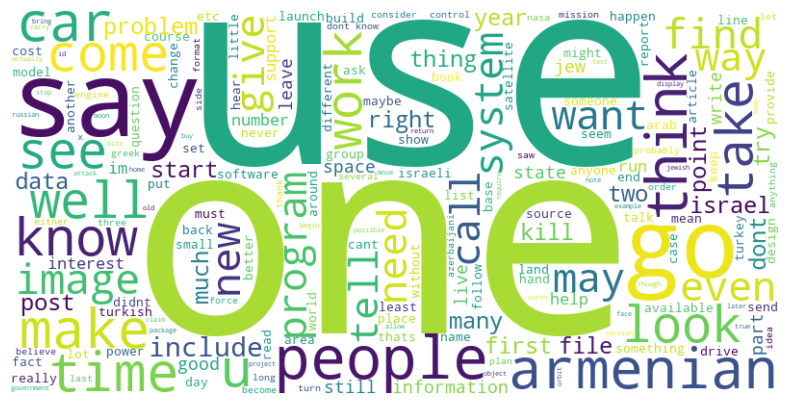

In [16]:
# --- Word Cloud from Corpus --- 
# To make a meaningful word cloud, let's combine all text from the cleaned corpus
full_cleaned_text = " ".join(cleaned_corpus)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_cleaned_text)

print("--- Word Cloud of Corpus --- ")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Advaced Level (Optional for Basic Level)**

<style>
blue {
  color: skyblue;
}
</style>

## 3) **Encodings**

<blue>**Label Encoding**</blue> is a technique used in machine learning and data processing to convert <blue>**categorical data**</blue> (such as text-based or symbolic data) into <blue>**numerical values**</blue>. For example, if you have categories like “Apple”, “Chicken” and “Broccoli” you assign them numerical labels such as 1 for “Apple”, 2 for “Chicken” and 3 for “Broccoli”.

<blue>**One-hot Encoding**</blue> is another technique used in machine learning to convert <blue>**categorical data**</blue> into a format that can be provided to machine learning algorithms more easily. One-hot Encoding takes each categorical value and turns it into a <blue>**binary vector**</blue>. Each category is represented as a binary vector.


In [17]:
# 3. Encodings

# --- Label Encoding --- 
# This is used for categorical labels, e.g., if we were classifying our documents.
# Let's create some dummy labels for our 4 documents.
labels = ['Intro', 'Detail', 'History', 'Links']

print(f"Original Labels: {labels}")

# Create a mapping
label_map = {label: i for i, label in enumerate(set(labels))}
encoded_labels = [label_map[label] for label in labels]

print(f"Label Encoded:   {encoded_labels}")
print(f"Mapping:         {label_map}\n")

# --- One-Hot Encoding --- 
# This is also for categorical data. Let's one-hot encode our labels.

# We need to reshape the data for scikit-learn's OneHotEncoder
labels_reshaped = np.array(labels).reshape(-1, 1)

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(labels_reshaped)

print("--- One-Hot Encoding of Labels --- ")
print(f"Categories: {one_hot_encoder.categories_}")
print("One-Hot Matrix:")
print(one_hot_encoded)

print("\n--- Comparison --- ")
for i in range(len(labels)):
    print(f"{labels[i]:<10} | Label Encoded: {encoded_labels[i]} | One-Hot Encoded: {one_hot_encoded[i]}")

Original Labels: ['Intro', 'Detail', 'History', 'Links']
Label Encoded:   [2, 1, 3, 0]
Mapping:         {'Links': 0, 'Detail': 1, 'Intro': 2, 'History': 3}

--- One-Hot Encoding of Labels --- 
Categories: [array(['Detail', 'History', 'Intro', 'Links'], dtype='<U7')]
One-Hot Matrix:
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

--- Comparison --- 
Intro      | Label Encoded: 2 | One-Hot Encoded: [0. 0. 1. 0.]
Detail     | Label Encoded: 1 | One-Hot Encoded: [1. 0. 0. 0.]
History    | Label Encoded: 3 | One-Hot Encoded: [0. 1. 0. 0.]
Links      | Label Encoded: 0 | One-Hot Encoded: [0. 0. 0. 1.]


<style>
blue {
  color: skyblue;
}
</style>

## 4) **Word Embeddings**

Word embeddings are <blue>**dense vector representations**</blue> of words that capture their meanings by placing words with <blue>**similar meanings closer**</blue> in <blue>**vector space**</blue>. Unlike BoW or one-hot encoding, embeddings <blue>**capture relationships**</blue> between words based on context. For example, in an embedding space, words like "king" and "queen" or "apple" and "fruit" would be closer together, reflecting their <blue>**semantic similarity**</blue>. These embeddings are learned from large datasets and can be used as inputs to machine learning models for various NLP tasks. Popular techniques for generating word embeddings include <blue>**Word2Vec**</blue>, <blue>**GloVe**</blue>, and <blue>**FastText**</blue>.

<style>
blue {
  color: skyblue;
}
</style>

## 5) **Word2Vec**

Word2Vec is a model used to <blue>**learn word embeddings**</blue>, developed by <blue>**Google**</blue>. It transforms words into <blue>**continuous vector representations**</blue> using neural networks. There are two primary approaches: <blue>**Skip-gram**</blue> and <blue>**Continuous Bag of Words (CBOW)**</blue>. Skip-gram <blue>**predicts surrounding words**</blue> given a <blue>**target word**</blue>, while CBOW <blue>**predicts**</blue> the <blue>**target word**</blue> based on its <blue>**context**</blue>. For example, in the sentence "The dog barked loudly", Skip-gram might learn that "dog" is likely to appear near words like "barked", while CBOW learns that "dog" fits between "The" and "barked". This method helps capture semantic relationships between words in a computationally efficient manner.



In [18]:
# 5. Word2Vec

# Word2Vec requires a list of lists (sentences) of tokens.
# We'll re-tokenize our `cleaned_corpus`
tokenized_corpus_for_w2v = [doc.split() for doc in cleaned_corpus]

print("--- Tokenized Corpus for Word2Vec --- ")
for sent in tokenized_corpus_for_w2v:
    print(sent)

# --- CBOW Model --- 
# sg=0 specifies CBOW
# vector_size = dimension of the embedding
# window = context window size
# min_count = ignore words with frequency lower than this
# Note: Our corpus is *tiny*, so the results won't be semantically rich.
# We set min_count=1 to include all our words.
cbow_model = Word2Vec(sentences=tokenized_corpus_for_w2v, vector_size=50, window=3, min_count=1, sg=0)

# --- Skip-Gram Model --- 
# sg=1 specifies Skip-Gram
skipgram_model = Word2Vec(sentences=tokenized_corpus_for_w2v, vector_size=50, window=3, min_count=1, sg=1)

print("\n--- Models Trained --- ")

# --- Check Vocabulary --- 
vocab = list(cbow_model.wv.key_to_index.keys())
print(f"\nModel Vocabulary (CBOW): {vocab}")

# --- Get Embedding Vector for a Word --- 
word = 'nlp'
if word in vocab:
    print(f"\n--- Word Embedding for '{word}' (CBOW) --- ")
    print(cbow_model.wv[word])
    print(f"Vector shape: {cbow_model.wv[word].shape}")

# --- Find Similar Words --- 
# This shows the power of embeddings, though results are weak on our small corpus.
try:
    print(f"\n--- Words similar to 'nlp' (CBOW) --- ")
    print(cbow_model.wv.most_similar('nlp', topn=5))
    
    print(f"\n--- Words similar to 'nlp' (Skip-Gram) --- ")
    print(skipgram_model.wv.most_similar('nlp', topn=5))
    
    print(f"\n--- Similarity between 'nlp' and 'language' (CBOW) --- ")
    similarity_cbow = cbow_model.wv.similarity('nlp', 'language')
    print(similarity_cbow)
    
    print(f"\n--- Similarity between 'nlp' and 'language' (Skip-Gram) --- ")
    similarity_skipgram = skipgram_model.wv.similarity('nlp', 'language')
    print(similarity_skipgram)
    
except KeyError as e:
    print(f"Could not find word: {e}")
    
print("\nNote: With a tiny corpus, 'similarity' is not very meaningful, but this shows the API.")

--- Tokenized Corpus for Word2Vec --- 
['heed', 'man', 'warnings', 'get', 'carb', 'cleaner', 'strong', 'hand', 'hand', 'eat', 'away', 'pretty', 'hence', 'dip', 'method', 'later']
['terrorist', 'camp', 'israelis', 'like', 'view', 'villages', 'small', 'communities', 'kid', 'play', 'soccer', 'streets', 'women', 'prepare', 'lunch', 'men', 'play', 'card', 'etc', 'young', 'men', 'usually', 'age', 'years', 'members', 'lebanese', 'resistance', 'even', 'inhabitants', 'village', 'know', 'secretive', 'people', 'often', 'suspect', 'young', 'men', 'support', 'financially', 'iran', 'time', 'sneak', 'arm', 'ammunitions', 'occupy', 'zone', 'set', 'booby', 'trap', 'israeli', 'patrol', 'every', 'time', 'israeli', 'soldier', 'kill', 'injure', 'trap', 'israel', 'retalliates', 'indiscriminately', 'bomb', 'villages', 'choose', 'often', 'kill', 'innocent', 'civilians', 'try', 'true', 'method', 'utilize', 'guerilla', 'terrorists', 'group', 'conduct', 'operations', 'midst', 'local', 'populace', 'thus', 'force'

# **Assignment Complete**

You have now seen how to:
1.  Create a corpus from a web source.
2.  Apply all 8 pre-processing techniques (Lowercasing, Punctuation Removal, Stop-word Removal, URL Removal, HTML Tag Removal, Stemming, Lemmatization, and Tokenization) to a test document.
3.  Build a consolidated pre-processing pipeline to clean the entire corpus.
4.  Implement Bag of Words (BoW) on the clean corpus.
5.  Implement TF-IDF and generate a Word Cloud from the clean corpus.
6.  Demonstrate Label and One-Hot Encodings.
7.  Train Word2Vec (CBOW and Skip-Gram) models on the clean corpus.